In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import os
from PIL import Image

### 1. Affine Transformation

In [3]:
inputImage = np.zeros((300, 200))
inputImage[50:200, 20:100] = 100

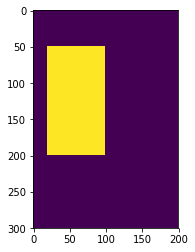

In [4]:
plt.imshow(inputImage)

In [5]:
# def calImageDer(img, dimension):
#     img_shape = img.shape
#     res = np.zeros(img_shape)
#     if dimension == "x":
#         for i in range(img_shape[0]):
#             for j in range(img_shape[1]):
#                 if j == 0 or j == (img_shape[1] - 1):
#                     res[i][j] = img[i][j] - 0
#                 else:
#                     res[i][j] = img[i][j + 1] - img[i][j - 1]
#     if dimension == "y":
#         for i in range(img_shape[0]):
#             for j in range(img_shape[1]):
#                 if i == 0 or i == (img_shape[0] - 1):
#                     res[i][j] = img[i][j] - 0
#                 else:
#                     res[i][j] = img[i+1][j] - img[i-1][j]
#     return res

In [6]:
def calYGradient(source, newPixel):
    x, y = newPixel[0], newPixel[1]
    x0, x1 = int(x), int(x)+1
    y0, y1 = int(y), int(y)+1
    fr1 = (source[x0][y0] + source[x1][y0]) / 2
    fr2 = (source[x0][y1] + source[x1][y1]) / 2
    fp = (fr2 - fr1) / 2
    return fp

In [7]:
def calXGradient(source, newPixel):
    x, y = newPixel[0], newPixel[1]
    x0, x1 = int(x), int(x)+1
    y0, y1 = int(y), int(y)+1
    fr1 = (source[x0][y0] + source[x0][y1]) / 2
    fr2 = (source[x1][y0] + source[x1][y1]) / 2
    fp = (fr2 - fr1) / 2
    return fp

In [8]:
# need to be implemented in Numpy
def interpolate(source, newPixel):
    x, y = newPixel[0], newPixel[1]
    x0, x1 = int(x), int(x)+1
    y0, y1 = int(y), int(y)+1
    # Calculate gradient of I(x, y)
#     fp = ((1-(y-y0))*(source[source[]]))
#     fr1 = source[x0][y0]*(x1-x)/(x1-x0) + source[x1][y0]*(x-x0)/(x1-x0)
#     fr2 = source[x0][y1]*(x1-x)/(x1-x0) + source[x1][y1]*(x-x0)/(x1-x0)
    fp = (y1-y)/(y1-y0)*fr1 + (y-y0)/(y1-y0)*fr2
    return fp

In [9]:
# need to be implemented in Numpy
def bilinearInterpolate(source, transformedImage, matrix):
    shape = transformedImage.shape
    gradientXMatrix = np.zeros(shape)
    gradientYMatrix = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            pixel = np.array([i, j, 1]).reshape(-1, 1) # pixel position in transformed image
            newPixel = np.dot(matrix, pixel) # corresponding postion in source image
            newPixel = newPixel.flatten()
            if newPixel[0] < shape[0]-1 and newPixel[0] > 0 and newPixel[1] < shape[1]-1 and newPixel[1] > 0:
                transformedImage[i][j] = interpolate(source, newPixel)
                gradientXMatrix[i][j] = calXGradient(source, newPixel)
                gradientYMatrix[i][j] = calYGradient(source, newPixel)
                
    return gradientXMatrix, gradientYMatrix

In [10]:
def buildXMatrix(img, dimension):
    img_shape = img.shape
    res = np.zeros(img_shape)
    if dimension == "x":
        for i in range(img_shape[0]):
            for j in range(img_shape[1]):
                res[i][j] = i
    if dimension == "y":
        for i in range(img_shape[0]):
            for j in range(img_shape[1]):
                res[i][j] = j
    return res

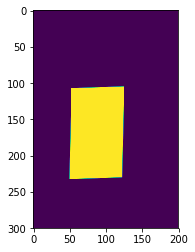

In [17]:
reference = np.zeros(inputImage.shape)
matrix = np.array([[1.2, 0.03, -80.0],[0.02, 1.1, -40],[0, 0, 1.0]])

bilinearInterpolate(inputImage, reference, matrix)
# reference = scipy.ndimage.affine_transform(input=inputImage, matrix=matrix)
plt.imshow(reference)

In [18]:
moving = np.zeros(inputImage.shape)
sameMatrix =np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]])
bilinearInterpolate(inputImage, moving, matrix)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

loss:  120246515.9396
loss:  44809324.413258545
loss:  40139542.687046885
loss:  35616809.16780315
[[  1.16186912  -0.5141328  -20.14657368]
 [ -0.10276263   1.19420995 -18.93322116]
 [  0.           0.           1.        ]]


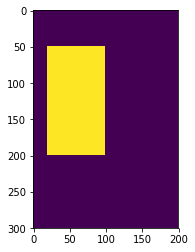

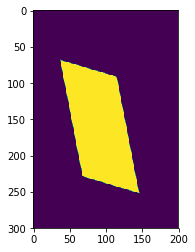

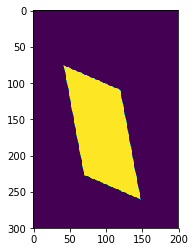

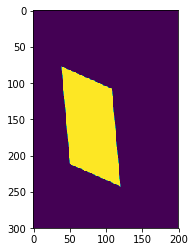

In [20]:
a, b, tx, c, d, ty = 1, 0, 0, 0, 1, 0
speed = 1e-9
translationSpeed = 1e-6
iterate = 200
n = 0
# moving = inputImage[:][:]
while  n < iterate:
    paraMatrix = np.array([[a, b, tx], [c, d, ty], [0, 0, 1]])
    gradX, gradY = bilinearInterpolate(inputImage, moving, paraMatrix)
    delta_a = speed * np.sum((moving-reference) * gradX * buildXMatrix(moving, "x"))
    delta_b = speed * np.sum((moving-reference) * gradX * buildXMatrix(moving, "y"))
    delta_tx = translationSpeed * np.sum((moving-reference) *gradX)
    delta_c = speed * np.sum((moving-reference) * gradY * buildXMatrix(moving, "x"))
    delta_d = speed * np.sum((moving-reference) * gradY * buildXMatrix(moving, "y"))
    delta_ty = translationSpeed * np.sum((moving-reference) * gradY)
    a -= delta_a
    b -= delta_b
    tx -= delta_tx
    c -= delta_c
    d -= delta_d
    ty -= delta_ty
#     print(gradX[40:60], gradY[40:60])
#     print("loss", np.sum((moving - reference)**2))
#     moving = scipy.ndimage.affine_transform(input=inputImage, matrix=paraMatrix)
    if n%50 == 0:
        plt.figure(n//40)
        plt.imshow(moving)
        print("loss: ", np.sum((moving - reference)**2))


    n += 1
    
plt.imshow(moving)
print(paraMatrix)



32352532.178612325
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


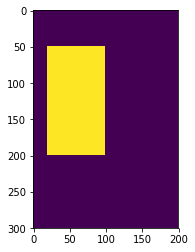

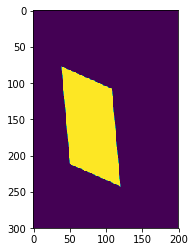

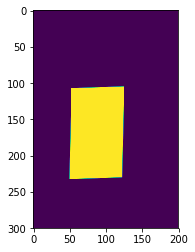

In [21]:
print(np.sum((moving - reference)**2))
plt.figure(3)
plt.imshow(inputImage)
plt.figure(1)
plt.imshow(moving)
print(moving)
plt.figure(2)
plt.imshow(reference)
print(reference)